In [46]:
!pip install gensim

In [47]:
!pip install nltk

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

script = pd.read_csv('Game_of_Thrones_Script_count_senti.csv')
script_text = script[["Name", "Sentence"]]

In [4]:
script_text

,Name,Sentence
0,waymar royce,What do you expect? They're savages. One lot s...
1,will,I've never seen wildlings do a thing like this...
2,waymar royce,How close did you get?
3,will,Close as any man would.
4,gared,We should head back to the wall.
...,...,...
23906,brienne,I think we can all agree that ships take prece...
23907,bronn,I think that's a very presumptuous statement.
23908,tyrion lannister,I once brought a jackass and a honeycomb into ...
23909,man,The Queen in the North!


In [5]:
import nltk
nltk.download('stopwords')

STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['Sentence']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(script_text)
data.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MaximilianDargatz\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


,Name,Sentence
0,waymar royce,expect theyre savages lot steals goat another ...
1,will,ive never seen wildlings thing like ive never ...
2,waymar royce,close get
3,will,close would
4,gared,head back wall


In [6]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Sentence']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

[['expect',
  'theyre',
  'savages',
  'lot',
  'steals',
  'goat',
  'another',
  'lot',
  'know',
  'theyre',
  'ripping',
  'pieces'],
 ['ive',
  'never',
  'seen',
  'wildlings',
  'thing',
  'like',
  'ive',
  'never',
  'seen',
  'thing',
  'like',
  'ever',
  'life']]

In [61]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [67]:
# Load Google's pre-trained Word2Vec model.
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('./wordembmodel/GoogleNews-vectors-negative300.bin.gz', binary=True)  

In [167]:
tsne_plot(model)

C:\Users\MaximilianDargatz\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


KeyboardInterrupt: 

In [148]:
data = model.most_similar('king', topn=5)

In [ ]:
plot_similarity(data)

<BarContainer object of 5 artists>

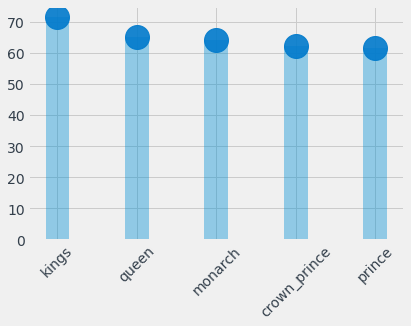

In [185]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'
plt.style.use("fivethirtyeight")
plt.xticks(rotation=45)
plt.plot(data["word"],data["number"]*100, "o", markersize=24, color='#007ACC', alpha=0.9)
plt.bar(data["word"],data["number"]*100, alpha=0.4, width=0.3)

In [129]:
model.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [130]:
model.most_similar(positive=['mother', 'father'], topn=5)

[('son', 0.8781619668006897),
 ('daughter', 0.849882960319519),
 ('grandmother', 0.8119575381278992),
 ('aunt', 0.8068366646766663),
 ('uncle', 0.8038020133972168)]

In [7]:
model_got = word2vec.Word2Vec(corpus, size=64, window=5, min_count=20, workers=8)

In [8]:
model_got.most_similar("jon")

C:\Users\MaximilianDargatz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('snow', 0.9667421579360962),
 ('castle', 0.9398133158683777),
 ('arryn', 0.9362656474113464),
 ('lord', 0.9350619912147522),
 ('commander', 0.9318682551383972),
 ('black', 0.9292797446250916),
 ('bastard', 0.9280521869659424),
 ('bolton', 0.9261823296546936),
 ('winterfell', 0.9245812892913818),
 ('ramsay', 0.9245330095291138)]

In [9]:
model_got.most_similar("stark")

C:\Users\MaximilianDargatz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('winterfell', 0.9955635070800781),
 ('sansa', 0.9951852560043335),
 ('lady', 0.9932955503463745),
 ('eddard', 0.9931188821792603),
 ('arya', 0.9925612807273865),
 ('bolton', 0.9924825429916382),
 ('starks', 0.9923782348632812),
 ('robb', 0.9922125339508057),
 ('catelyn', 0.9921923279762268),
 ('warden', 0.9921785593032837)]

In [10]:
model_got.most_similar("tywin")

C:\Users\MaximilianDargatz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('tyrion', 0.998992919921875),
 ('cersei', 0.9983901381492615),
 ('uncle', 0.9980584383010864),
 ('jaime', 0.9980368614196777),
 ('named', 0.9980107545852661),
 ('margaery', 0.9979971051216125),
 ('meryn', 0.9979846477508545),
 ('loras', 0.9979731440544128),
 ('whose', 0.9979450106620789),
 ('lannisters', 0.9979298114776611)]

In [11]:
model_got.most_similar(positive=['tywin', 'son'])

C:\Users\MaximilianDargatz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word 'son' not in vocabulary"

In [13]:
model_got.most_similar(positive=['jaime', 'cersei', 'tyrion'], topn=5)

C:\Users\MaximilianDargatz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('tywin', 0.9992905855178833),
 ('loras', 0.9987112283706665),
 ('margaery', 0.9986206889152527),
 ('uncle', 0.9986121654510498),
 ('meryn', 0.9985939860343933)]